In [4]:
import os
import pandas as pd
import Finalized_pipeline

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


### BACE classification 

In [7]:
results_bace_class = pd.read_csv("RERUN_top_100\RERUN_BACE_class.csv")
print(results_bace_class.iloc[0]['hyperparams'])
results_bace_class.head()

{'C': 0.01, 'kernel': 'poly', 'gamma': 0.05}


,model,hyperparams,roc_auc,train_roc_auc,accuracy,train_accuracy,precision,train_precision,recall,train_recall,f1,train_f1,split,preprocessing
0,SVC,"{'C': 0.01, 'kernel': 'poly', 'gamma': 0.05}",0.880874,0.873432,0.881579,0.872153,0.887324,0.832268,0.863014,0.883051,0.875000,0.856908,0.9,Descriptors
1,SVC,"{'C': 1, 'kernel': 'rbf', 'gamma': 0.05}",0.867696,0.887544,0.868421,0.886113,0.873239,0.848000,0.849315,0.898305,0.861111,0.872428,0.9,Descriptors
2,LogisticRegression,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.861366,0.956064,0.861842,0.955180,0.861111,0.935750,0.849315,0.962712,0.855172,0.949039,0.9,Fingerprints
3,LogisticRegression,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.861366,0.956912,0.861842,0.955915,0.861111,0.935855,0.849315,0.964407,0.855172,0.949917,0.9,Fingerprints
4,SVC,"{'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}",0.860846,0.907043,0.861842,0.905952,0.871429,0.873786,0.835616,0.915254,0.853147,0.894040,0.9,Descriptors


In [6]:
dataset_path = "..\split_datasets\split0.9_bace.csv"

df = pd.read_csv(dataset_path)

if not "pIC50" in df.columns:
    df = Finalized_pipeline.calculate_pIC50(df, "target")

if True:
    df = Finalized_pipeline.calculate_classification_labels(df, "pIC50", threshold=7)
    target_column = "label"
else:
    target_column = "pIC50"

if "mol" in df.columns:
    df.rename(columns={"mol": "SMILES"}, inplace=True)
    
if False:
    runtype = "regression"
else:
    runtype = "classification"

df = Finalized_pipeline.calculate_features(df, calculate_descriptors=True, calculate_fingerprints=False, 
                                                SMILES_column_name="SMILES", target_column_name=target_column, 
                                                split_column_name="Split")

hyperparams = {"dt": {}, "rf": {}, "lr": {}, "nn": {}, "gb": {}, "xg": {}, "sv": {'C': [0.01], 'kernel': ['poly'], 'gamma': [0.05]}}
best_bace_class, X_test_bace_class = Finalized_pipeline.hyperparameter_search(df, hyperparams, output_file_name="scrap.csv")
best_bace_class


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
overflow encountered in reduce


Regression:  False
dt
{}
time:  2.643531
0 0.7079937575862667 0.9891820000439666 0.7105263157894737 0.9904481998530492 0.7230769230769231 0.998272884283247 0.6438356164383562 0.9796610169491525 0.6811594202898551 0.9888793840889649 DecisionTreeClassifier {}
rf
{}
time:  6.186247
1 0.8402982486561471 0.9909725428125481 0.8421052631578947 0.9904481998530492 0.8656716417910447 0.983249581239531 0.7945205479452054 0.9949152542372881 0.8285714285714286 0.9890480202190395 RandomForestClassifier {}
lr
{}
time:  0.141047
2 0.8213109068839952 0.8595264789289718 0.8223684210526315 0.861131520940485 0.8285714285714286 0.8347245409015025 0.7945205479452054 0.847457627118644 0.8111888111888111 0.8410428931875525 LogisticRegression {}
nn
{}


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


time:  3.205553
3 0.8434194555228021 0.8434379740156961 0.8421052631578947 0.8332108743570904 0.810126582278481 0.7510373443983402 0.8767123287671232 0.9203389830508475 0.8421052631578948 0.8271134805788272 MLPClassifier {}
gb
{}
time:  89.739011
4 0.7744061036934281 0.9537206797247685 0.7763157894736842 0.9529757531227039 0.7910447761194029 0.933993399339934 0.726027397260274 0.9593220338983051 0.757142857142857 0.9464882943143813 GradientBoostingClassifier {}
xg
{}
time:  5.124947
5 0.8139413906710595 0.99057464441953 0.8157894736842105 0.9904481998530492 0.835820895522388 0.9865092748735245 0.7671232876712328 0.9915254237288136 0.8 0.9890109890109889 XGBClassifier {}
sv
{'C': 1, 'kernel': 'rbf', 'gamma': 0.05}
time:  1.26814
6 0.8676955089301196 0.8875442414649697 0.868421052631579 0.8861131520940485 0.8732394366197183 0.848 0.8493150684931506 0.8983050847457628 0.861111111111111 0.8724279835390946 SVC {'C': 1, 'kernel': 'rbf', 'gamma': 0.05}


SVC(C=1, gamma=0.05)

### BACE regression

In [9]:
results_bace_reg = pd.read_csv("RERUN_top_100\RERUN_BACE_regre.csv")
print(results_bace_reg.iloc[0]['hyperparams'])
results_bace_reg.head()

{'C': 1, 'kernel': 'rbf', 'epsilon': 0.01, 'gamma': 'scale'}


,model,hyperparams,mse,train_mse,rmse,train_rmse,mae,train_mae,r2,train_r2,split,preprocessing
0,SVR,"{'C': 1, 'kernel': 'rbf', 'epsilon': 0.01, 'ga...",0.355874,0.225765,0.596552,0.475147,0.427565,0.269352,0.804753,0.874454,0.9,Fingerprints
1,SVR,"{'C': 1, 'kernel': 'rbf', 'epsilon': 0.01, 'ga...",0.355874,0.225765,0.596552,0.475147,0.427565,0.269352,0.804753,0.874454,0.9,Fingerprints
2,SVR,"{'C': 1, 'kernel': 'rbf', 'epsilon': 0.1, 'gam...",0.360975,0.224310,0.600812,0.473614,0.429990,0.299577,0.801955,0.875263,0.9,Fingerprints
3,SVR,"{'C': 1, 'kernel': 'rbf', 'epsilon': 0.1, 'gam...",0.360975,0.224310,0.600812,0.473614,0.429990,0.299577,0.801955,0.875263,0.9,Fingerprints
4,SVR,"{'C': 10, 'kernel': 'rbf', 'epsilon': 0.1, 'ga...",0.420022,0.231040,0.648091,0.480667,0.473385,0.296893,0.769559,0.871520,0.9,DescFing


In [10]:
dataset_path = "..\split_datasets\split0.9_bace.csv"

df = pd.read_csv(dataset_path)

if not "pIC50" in df.columns:
    df = Finalized_pipeline.calculate_pIC50(df, "target")

if False:
    df = Finalized_pipeline.calculate_classification_labels(df, "pIC50", threshold=7)
    target_column = "label"
else:
    target_column = "pIC50"

if "mol" in df.columns:
    df.rename(columns={"mol": "SMILES"}, inplace=True)
    
if True:
    runtype = "regression"
else:
    runtype = "classification"

df = Finalized_pipeline.calculate_features(df, calculate_descriptors=False, calculate_fingerprints=True, 
                                                SMILES_column_name="SMILES", target_column_name=target_column, 
                                                split_column_name="Split")

hyperparams = {"dt": {}, "rf": {}, "lr": {}, "nn": {}, "gb": {}, "xg": {}, "sv": {'C': [1], 'kernel': ['rbf'], 'epsilon': [0.01], 'gamma': ['scale']}}
best_bace_regr, X_test_bace_regr = Finalized_pipeline.hyperparameter_search(df, hyperparams, output_file_name="scrap.csv")
best_bace_regr


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Regression:  True
dt
{}
time:  0.246562
0 0.9596662750009766 0.1481709863092433 0.92095935937425 0.021954641183853964 0.6568439726973684 0.02480137038941954 0.49472540904182205 0.9877912063821438 DecisionTreeRegressor {}
rf
{}
time:  14.481802
1 0.7507213665199927 0.29400351160893845 0.5635825701496451 0.0864380648383872 0.5321022589214913 0.20572157001908725 0.6907963964913667 0.9519325100555576 RandomForestRegressor {}
lr
{}
time:  1.179506
2 42634072026.23579 0.20380679511812275 1.8176640975382609e+21 0.04153720973632046 21399390151.939728 0.08297247915046238 -9.972421410723647e+20 0.97690150265333 LinearRegression {}
nn
{}


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


time:  17.156295
3 0.7902201761043394 0.2695714984716498 0.6244479267223731 0.0726687927882507 0.587684420857126 0.16526374870867994 0.6574032637404226 0.9595894878818161 MLPRegressor {}
gb
{}
time:  2.502048
4 0.759221414194573 0.6448638111497069 0.5764171557716073 0.4158493349305249 0.5859344681359238 0.514155724827941 0.6837548371280295 0.768749638685814 GradientBoostingRegressor {}
xg
{}
time:  1.169887
5 0.7894460385222977 0.30028487580054436 0.6232250477385491 0.09017100663454834 0.5564894132785998 0.21862618674311926 0.658074183333186 0.9498566521266966 XGBRegressor {}
sv
{'C': 1, 'kernel': 'rbf', 'epsilon': 0.01, 'gamma': 'scale'}
time:  4.092475
6 0.5965519761057038 0.47514739353319435 0.35587426019562013 0.22576504558138824 0.4275649470984658 0.26935151982117 0.80475335917639 0.8744539332459627 SVR {'C': 1, 'kernel': 'rbf', 'epsilon': 0.01, 'gamma': 'scale'}


SVR(C=1, epsilon=0.01)

### ROR classification

In [11]:
results_ror_class = pd.read_csv("RERUN_top_100\RERUN_ROR_class.csv")
print(results_ror_class.iloc[0]['hyperparams'])
results_ror_class.head()

{'max_depth': 5, 'eta': 0.1, 'gamma': 0.1}


,model,hyperparams,roc_auc,train_roc_auc,accuracy,train_accuracy,precision,train_precision,recall,train_recall,f1,train_f1,split,preprocessing
0,XGBClassifier,"{'max_depth': 5, 'eta': 0.1, 'gamma': 0.1}",0.763592,0.974154,0.771689,0.975597,0.761364,0.973618,0.697917,0.966334,0.728261,0.969962,0.9,DescFing
1,XGBClassifier,"{'max_depth': 5, 'eta': 0.1, 'gamma': 0.01}",0.761306,0.975207,0.771689,0.976614,0.773810,0.974874,0.677083,0.967581,0.722222,0.971214,0.9,Descriptors
2,XGBClassifier,"{'max_depth': 5, 'eta': 0.1, 'gamma': 0}",0.761306,0.975207,0.771689,0.976614,0.773810,0.974874,0.677083,0.967581,0.722222,0.971214,0.9,DescFing
3,XGBClassifier,"{'max_depth': 5, 'eta': 0.1, 'gamma': 0.01}",0.761306,0.975207,0.771689,0.976614,0.773810,0.974874,0.677083,0.967581,0.722222,0.971214,0.9,DescFing
4,XGBClassifier,"{'max_depth': 5, 'eta': 0.1, 'gamma': 0}",0.761306,0.975207,0.771689,0.976614,0.773810,0.974874,0.677083,0.967581,0.722222,0.971214,0.9,Descriptors


In [13]:
dataset_path = "..\split_datasets\split0.9_ROR_data_1.csv"

df = pd.read_csv(dataset_path)

if not "pIC50" in df.columns:
    df = Finalized_pipeline.calculate_pIC50(df, "target")

if True:
    df = Finalized_pipeline.calculate_classification_labels(df, "pIC50", threshold=7)
    target_column = "label"
else:
    target_column = "pIC50"

if "mol" in df.columns:
    df.rename(columns={"mol": "SMILES"}, inplace=True)
    
if False:
    runtype = "regression"
else:
    runtype = "classification"

df = Finalized_pipeline.calculate_features(df, calculate_descriptors=True, calculate_fingerprints=True, 
                                                SMILES_column_name="SMILES", target_column_name=target_column, 
                                                split_column_name="Split")

hyperparams = {"dt": {}, "rf": {}, "lr": {}, "nn": {}, "gb": {}, "xg": {'max_depth': [5], 'eta': [0.1], 'gamma': [0.1]}, "sv": {}}
best_ror_class, X_test_ror_class = Finalized_pipeline.hyperparameter_search(df, hyperparams, output_file_name="scrap.csv")
best_ror_class


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Regression:  False
dt
{}
time:  4.520231
0 0.664380081300813 0.9810211595474833 0.6666666666666666 0.983731570920183 0.6138613861386139 0.9935897435897436 0.6458333333333334 0.9663341645885287 0.6294416243654822 0.9797724399494311 DecisionTreeClassifier {}
rf
{}
time:  8.344811
1 0.7491107723577236 0.9825752143247033 0.7579908675799086 0.983731570920183 0.7471264367816092 0.9836683417085427 0.6770833333333334 0.9763092269326683 0.7103825136612023 0.9799749687108886 RandomForestClassifier {}
lr
{}


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


time:  0.668748
2 0.7287855691056911 0.9039943060802929 0.7351598173515982 0.9120488052872394 0.7065217391304348 0.918774966711052 0.6770833333333334 0.8603491271820449 0.6914893617021278 0.8886027044430136 LogisticRegression {}
nn
{}
time:  42.72757
3 0.6726371951219512 0.9424084638189932 0.684931506849315 0.9527198779867819 0.6626506024096386 0.9971949509116409 0.5729166666666666 0.8865336658354115 0.6145251396648044 0.9386138613861386 MLPClassifier {}
gb
{}
time:  143.092971
4 0.7207825203252032 0.8958488970706282 0.7351598173515982 0.9049313675648195 0.7435897435897436 0.9138627187079408 0.6041666666666666 0.8466334164588528 0.6666666666666667 0.8789644012944983 GradientBoostingClassifier {}
xg
{'max_depth': 5, 'eta': 0.1, 'gamma': 0.1}
time:  7.387099
5 0.7832825203252032 0.9722838825682575 0.7899543378995434 0.9740721911540416 0.7777777777777778 0.9735182849936949 0.7291666666666666 0.9625935162094763 0.7526881720430108 0.9680250783699059 XGBClassifier {'max_depth': 5, 'eta': 0.1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### ROR regression

In [17]:
results_ror_reg = pd.read_csv("RERUN_top_100\RERUN_ROR_regre.csv")
print(results_ror_reg.iloc[1]['hyperparams'])
results_ror_reg.head()

{'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0, 'n_estimators': 100}


,model,hyperparams,mse,train_mse,rmse,train_rmse,mae,train_mae,r2,train_r2,split,preprocessing
0,GradientBoostingRegressor,"{'max_depth': 7, 'loss': 'huber', 'n_estimator...",0.400260,0.050603,0.632661,0.224951,0.471627,0.143357,0.556356,0.945182,0.9,DescFing
1,RandomForestRegressor,"{'max_depth': 20, 'min_samples_split': 10, 'mi...",0.403206,0.108300,0.634985,0.329090,0.473330,0.244970,0.553091,0.882678,0.9,DescFing
2,RandomForestRegressor,"{'max_depth': 20, 'min_samples_split': 10, 'mi...",0.404179,0.110176,0.635751,0.331927,0.474902,0.246225,0.552013,0.880646,0.9,DescFing
3,RandomForestRegressor,"{'max_depth': None, 'min_samples_split': 2, 'm...",0.404498,0.108334,0.636002,0.329141,0.478802,0.238879,0.551659,0.882642,0.9,DescFing
4,RandomForestRegressor,"{'max_depth': None, 'min_samples_split': 10, '...",0.405651,0.117296,0.636907,0.342485,0.480173,0.249401,0.550382,0.872932,0.9,DescFing


In [19]:
dataset_path = "..\split_datasets\split0.9_ROR_data_1.csv"

df = pd.read_csv(dataset_path)

if not "pIC50" in df.columns:
    df = Finalized_pipeline.calculate_pIC50(df, "target")

if False:
    df = Finalized_pipeline.calculate_classification_labels(df, "pIC50", threshold=7)
    target_column = "label"
else:
    target_column = "pIC50"

if "mol" in df.columns:
    df.rename(columns={"mol": "SMILES"}, inplace=True)
    
if True:
    runtype = "regression"
else:
    runtype = "classification"

df = Finalized_pipeline.calculate_features(df, calculate_descriptors=True, calculate_fingerprints=True, 
                                                SMILES_column_name="SMILES", target_column_name=target_column, 
                                                split_column_name="Split")

hyperparams = {"dt": {}, "rf": {'max_depth': [20], 'min_samples_split': [10], 'min_samples_leaf': [1], 'min_impurity_decrease': [0], 'n_estimators': [100]}, "lr": {}, "nn": {}, "gb": {}, "xg": {}, "sv": {}}
best_ror_regr, X_test_ror_regr = Finalized_pipeline.hyperparameter_search(df, hyperparams, output_file_name="scrap.csv")
best_ror_regr


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Regression:  True
dt
{}
time:  7.335813
0 0.8916565059276896 0.11725969276969654 0.7950513245631761 0.013749835548443622 0.6462728992615261 0.02493356568143426 0.11877509036300471 0.9851047436934431 DecisionTreeRegressor {}
rf
{'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0, 'n_estimators': 100}
time:  369.889082
1 0.637843134112934 0.3295823303597654 0.4068438637350103 0.10862451248537355 0.4819804724643173 0.24659250419918355 0.5490593676411619 0.882326595911355 RandomForestRegressor {'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0, 'n_estimators': 100}
lr
{}
time:  2.843148
2 306217092.1910527 0.11725970128538059 9.376890754994366e+16 0.013749837545536684 181066485.38627756 0.024964738266772913 -1.0393228025606898e+17 0.9851047415299836 LinearRegression {}
nn
{}
time:  37.553483
3 0.8519583221729761 0.25155280469661334 0.7258329827197925 0.0632788135507325 0.6528964177545609 0.16608410056737827 

RandomForestRegressor(max_depth=20, min_impurity_decrease=0,
                      min_samples_split=10)

In [20]:
import shap

  0%|          | 0/152 [00:00<?, ?it/s]

100%|██████████| 152/152 [20:34<00:00,  8.12s/it]


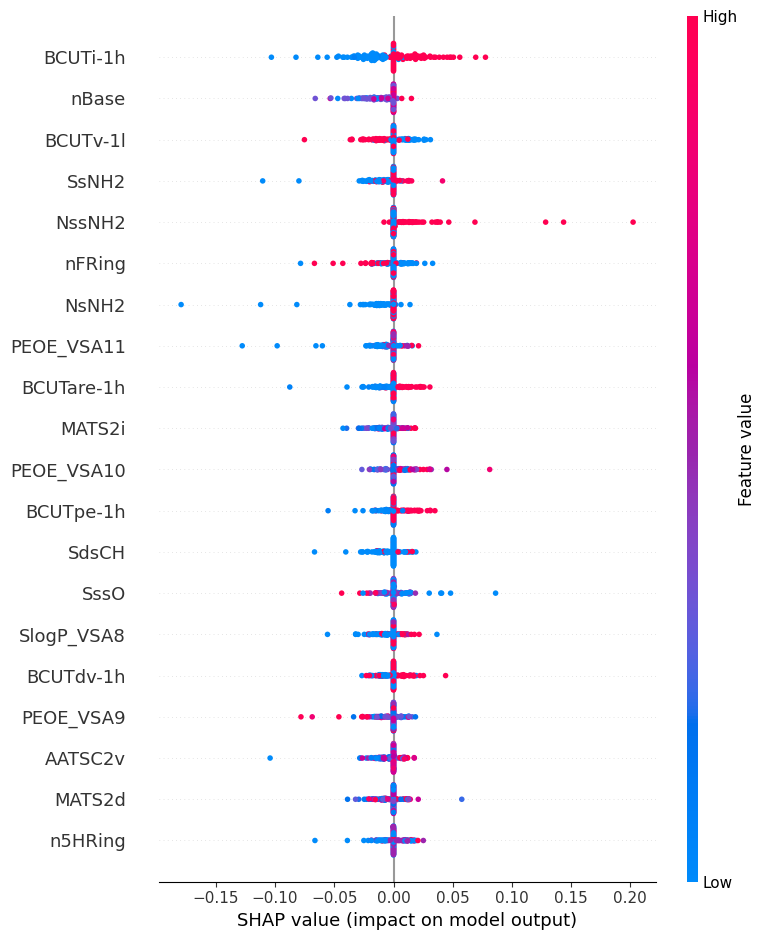

In [29]:
explainer = shap.KernelExplainer(best_bace_class.predict, X_test_bace_class[:2])
shap_values = explainer.shap_values(X_test_bace_class)
shap.summary_plot(shap_values, X_test_bace_class)

  0%|          | 0/152 [00:00<?, ?it/s]

100%|██████████| 152/152 [25:21<00:00, 10.01s/it]


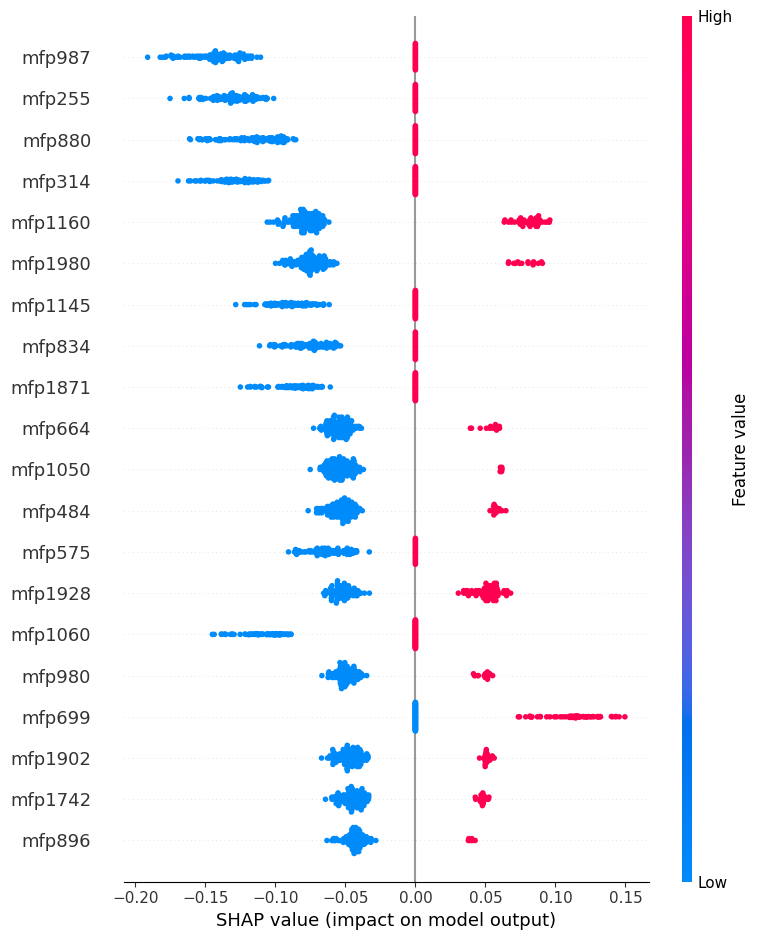

In [30]:
explainer = shap.KernelExplainer(best_bace_regr.predict, X_test_bace_regr[:2])
shap_values = explainer.shap_values(X_test_bace_regr)
shap.summary_plot(shap_values, X_test_bace_regr)

In [14]:
best_ror_class

RandomForestClassifier()

[15:40:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


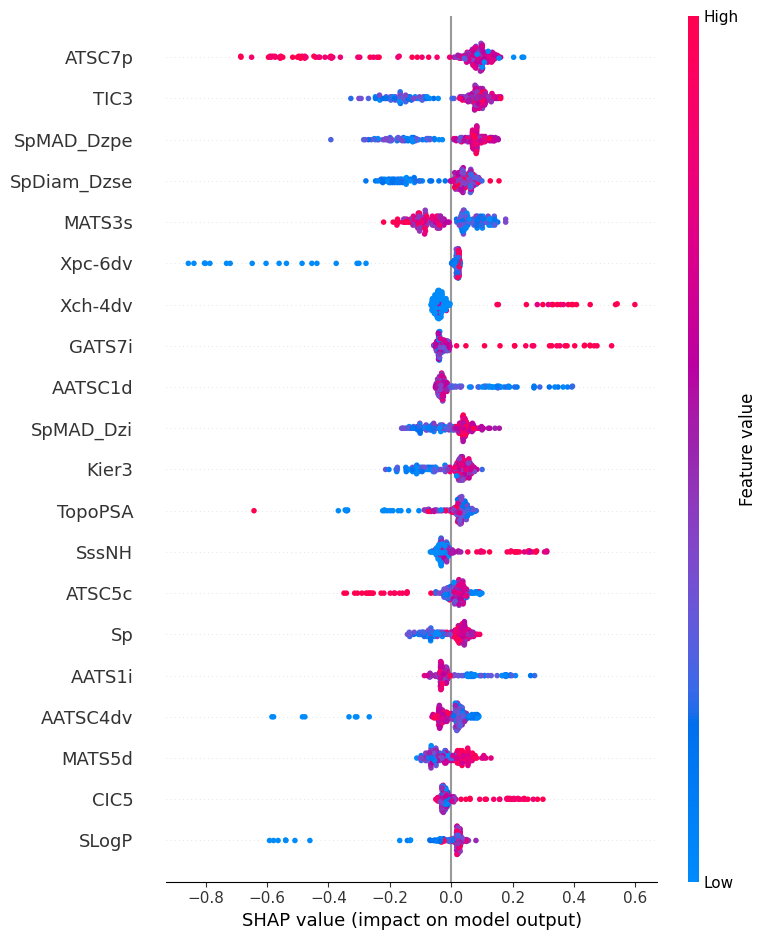

In [22]:
explainer = shap.TreeExplainer(best_ror_class)
shap_values = explainer.shap_values(X_test_ror_class)
shap.summary_plot(shap_values, X_test_ror_class)

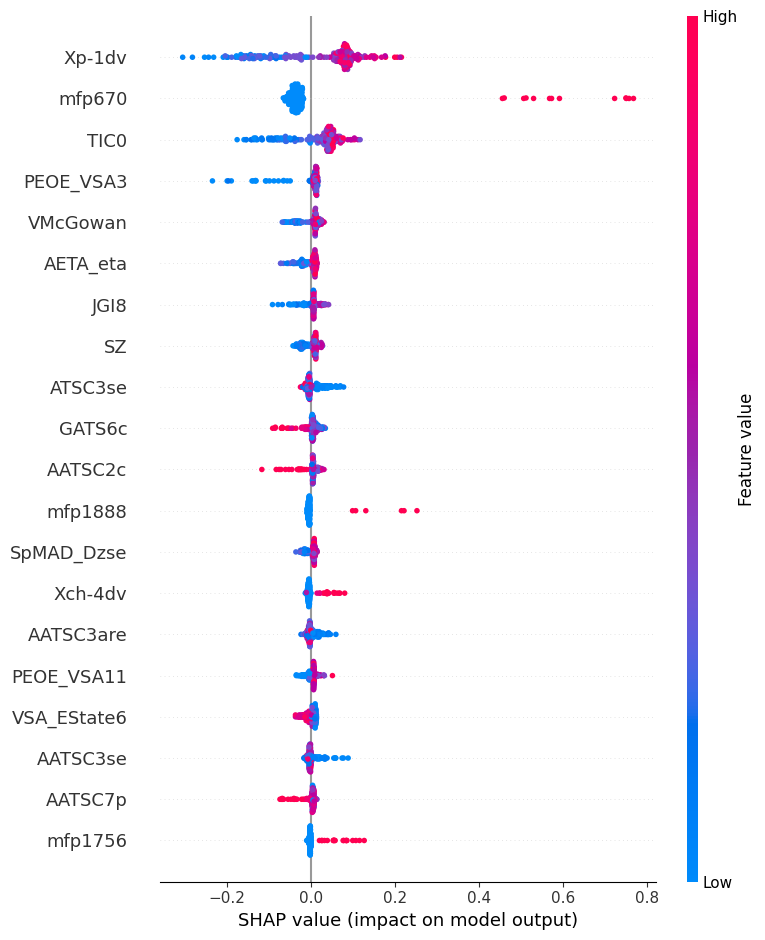

In [21]:
explainer = shap.TreeExplainer(best_ror_regr)
shap_values = explainer.shap_values(X_test_ror_regr)
shap.summary_plot(shap_values, X_test_ror_regr)